In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set_theme()

compre = pd.read_csv('./data/wp_compre.csv')
compre['code'] = compre['ID'].str[4:6]
compre['compre_marks'] = compre['Part-I(30)'] + compre['Part-II(120)']
#drop column from lab1
compre = compre[['ID', 'Name', 'compre_marks', 'code']]

practice = pd.read_csv('./data/WP_PCT.csv')
practice.rename(columns={'Prac(150)':'practice_marks'}, inplace=True)
# take only specific columns
practice = practice[['ID', 'Name', 'practice_marks']]

In [9]:
practice

,ID,Name,practice_marks
0,2020A7PS0095P,SAFDAR FAISAL .,75.0
1,2022A1PS0530P,IRA DOGRA .,115.5
2,2022A1PS0589P,ASLESH JAMBHALE .,111.5
3,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI .,117.0
4,2022A1PS0643P,SHIVANG GUPTA .,125.5
...,...,...,...
578,2022AAPS0360P,SPARSH JHANWAR .,122.5
579,2022AAPS0363P,NISHKARSH JAIN .,124.0
580,2022AAPS0366P,DIWAKAR MITTAL .,118.5
581,2022AAPS0369P,SUBRAT ROY .,121.0


In [3]:
# merge both dataframes
df = pd.merge(compre, practice, on=['ID', 'Name'])
df['Marks'] = df['compre_marks'] + df['practice_marks']
df

,ID,Name,compre_marks,code,practice_marks,Marks
0,2020A7PS0095P,SAFDAR FAISAL .,32,A7,75.0,107.0
1,2022A1PS0530P,IRA DOGRA .,52,A1,115.5,167.5
2,2022A1PS0589P,ASLESH JAMBHALE .,50,A1,111.5,161.5
3,2022A1PS0593P,AAYUSH AASHISH MAHESHWARI .,36,A1,117.0,153.0
4,2022A1PS0643P,SHIVANG GUPTA .,43,A1,125.5,168.5
...,...,...,...,...,...,...
578,2022AAPS0360P,SPARSH JHANWAR .,29,AA,122.5,151.5
579,2022AAPS0363P,NISHKARSH JAIN .,63,AA,124.0,187.0
580,2022AAPS0366P,DIWAKAR MITTAL .,50,AA,118.5,168.5
581,2022AAPS0369P,SUBRAT ROY .,29,AA,121.0,150.0


In [5]:
df[df['ID'] == '2022A7PS0097P']

,ID,Name,compre_marks,code,practice_marks,Marks
366,2022A7PS0097P,AVIRAL GUPTA .,60,A7,129.5,189.5


In [16]:
# calculate median and mode
median = df['Marks'].median()
mean = df['Marks'].mean()
print(f"Median: {median}, Average: {mean}")

Median: 164.5, Average: 162.45454545454547


In [21]:
max_marks = 300

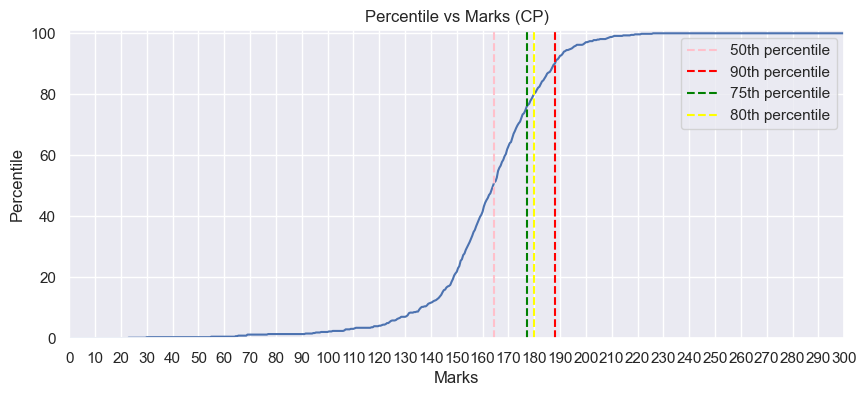

In [22]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,4))
fun = lambda k: [i/k for i in list(range(1, max_marks*k + 1))]

a = fun(2)
b = [stats.percentileofscore(df["Marks"],i, kind='weak') for i in a]
ax.plot(a, b)

lis = [i for i in range(0, 101)]

plt.axvline(x=df['Marks'].quantile([0.5]).values[0], color='pink', linestyle='--', label='50th percentile')
plt.axvline(x=df['Marks'].quantile([0.9]).values[0], color='red', linestyle='--', label='90th percentile')
plt.axvline(x=df['Marks'].quantile([0.75]).values[0], color='green', linestyle='--', label='75th percentile')
plt.axvline(x=df['Marks'].quantile([0.8]).values[0], color='yellow', linestyle='--', label='80th percentile')



ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_ylim(0,101)
ax.set_xlim(0,max_marks)
ax.set_xlabel("Marks")
ax.set_ylabel("Percentile")
ax.set_title("Percentile vs Marks (CP)")
ax.legend()
plt.show()